# LLaVA-NEXT Env:
python3.10下pip安装

In [ ]:
!git clone https://github.com/haotian-liu/LLaVA.git
!cd LLaVA
%pip install --upgrade pip  # enable PEP 660 support
%pip install -e .

## Run Code:

In [1]:
from llava.model.builder import load_pretrained_model
from llava.mm_utils import get_model_name_from_path
from llava.eval.run_llava import eval_model

model_path = "liuhaotian/llava-v1.6-vicuna-13b" # 因内存限制，运行了7b参数模型，如果有条件可尝试："liuhaotian/llava-v1.6-34b" 
model_name = get_model_name_from_path(model_path)

d:\anaconda\envs\llava\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import torch

class Configs:
    model_path = "liuhaotian/llava-v1.6-vicuna-13b" 
    #model_path = "./llava-v1.6-mistral-7b" #本地模型参数
    model_base = None
    model_name = model_name
    image_file = ""
    query = ""
    conv_mode = None
    sep = ","
    temperature = 0.2
    top_p = None
    num_beams = 1
    max_new_tokens = 512
    device = "cuda"

import requests
from PIL import Image
from io import BytesIO
import re


def image_parser(args):
    out = args.image_file.split(args.sep)
    return out


def load_image(image_file):
    if image_file.startswith("http") or image_file.startswith("https"):
        response = requests.get(image_file)
        image = Image.open(BytesIO(response.content)).convert("RGB")
    else:
        image = Image.open(image_file).convert("RGB")
    return image


def load_images(image_files):
    out = []
    for image_file in image_files:
        image = load_image(image_file)
        out.append(image)
    return out

def get_device_map() -> str:
    return 'cuda' if torch.cuda.is_available() else 'cpu'

dev = get_device_map()  # 'cpu'
print(dev)
args = Configs()

cuda


In [4]:
from warnings import filterwarnings
import re
from llava.constants import (
    IMAGE_TOKEN_INDEX,
    DEFAULT_IMAGE_TOKEN,
    DEFAULT_IM_START_TOKEN,
    DEFAULT_IM_END_TOKEN,
    IMAGE_PLACEHOLDER,
)


filterwarnings("ignore")
tokenizer, model, image_processor, context_len = load_pretrained_model(
        args.model_path, args.model_base, model_name
    )

You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield errors.

### Signle Page

In [9]:
import os
import json

# imgs_dir
loaded_data = os.listdir("data/docVQA-S")
loaded_data.sort()
loaded_data = loaded_data[1:]

# find the gt in gt json file
gt_obj = json.load(open("data/docVQA-S/spdocvqa_qas/train_v1.0_withQT.json",'r+'))
datas = gt_obj['data']
filted_gts = []
for data in datas:
    if data['image'].split('/')[-1] in loaded_data:
        filted_gts.append(data)

print(filted_gts)

# pick 10 imgs for testing:
samples = []
num = 0
last_name = ""
for gt in filted_gts:
    if num == 9:
        break
    img_flie = gt["image"].split('/')[-1]
    if img_flie != last_name:
        num+=1
        last_name = img_flie
    samples.append(gt)


[{'questionId': 1448, 'question': 'What is the date mentioned in this document?', 'question_types': ['layout'], 'image': 'documents/ffcn0226_5.png', 'docId': 667, 'ucsf_document_id': 'ffcn0226', 'ucsf_document_page_no': '5', 'answers': ['March 2017'], 'data_split': 'train'}, {'questionId': 1450, 'question': 'Who is the President of The Fertilizer Institute?', 'question_types': ['table/list'], 'image': 'documents/ffcn0226_5.png', 'docId': 667, 'ucsf_document_id': 'ffcn0226', 'ucsf_document_page_no': '5', 'answers': ['Chris Jahn'], 'data_split': 'train'}, {'questionId': 1452, 'question': 'Roger Johnson is associated with which union?', 'question_types': ['table/list'], 'image': 'documents/ffcn0226_5.png', 'docId': 667, 'ucsf_document_id': 'ffcn0226', 'ucsf_document_page_no': '5', 'answers': ['National Farmers Union'], 'data_split': 'train'}, {'questionId': 1453, 'question': 'What is the title of this document?', 'question_types': ['layout'], 'image': 'documents/ffcn0226_5.png', 'docId': 

33
------------------------------Picture-------------------------


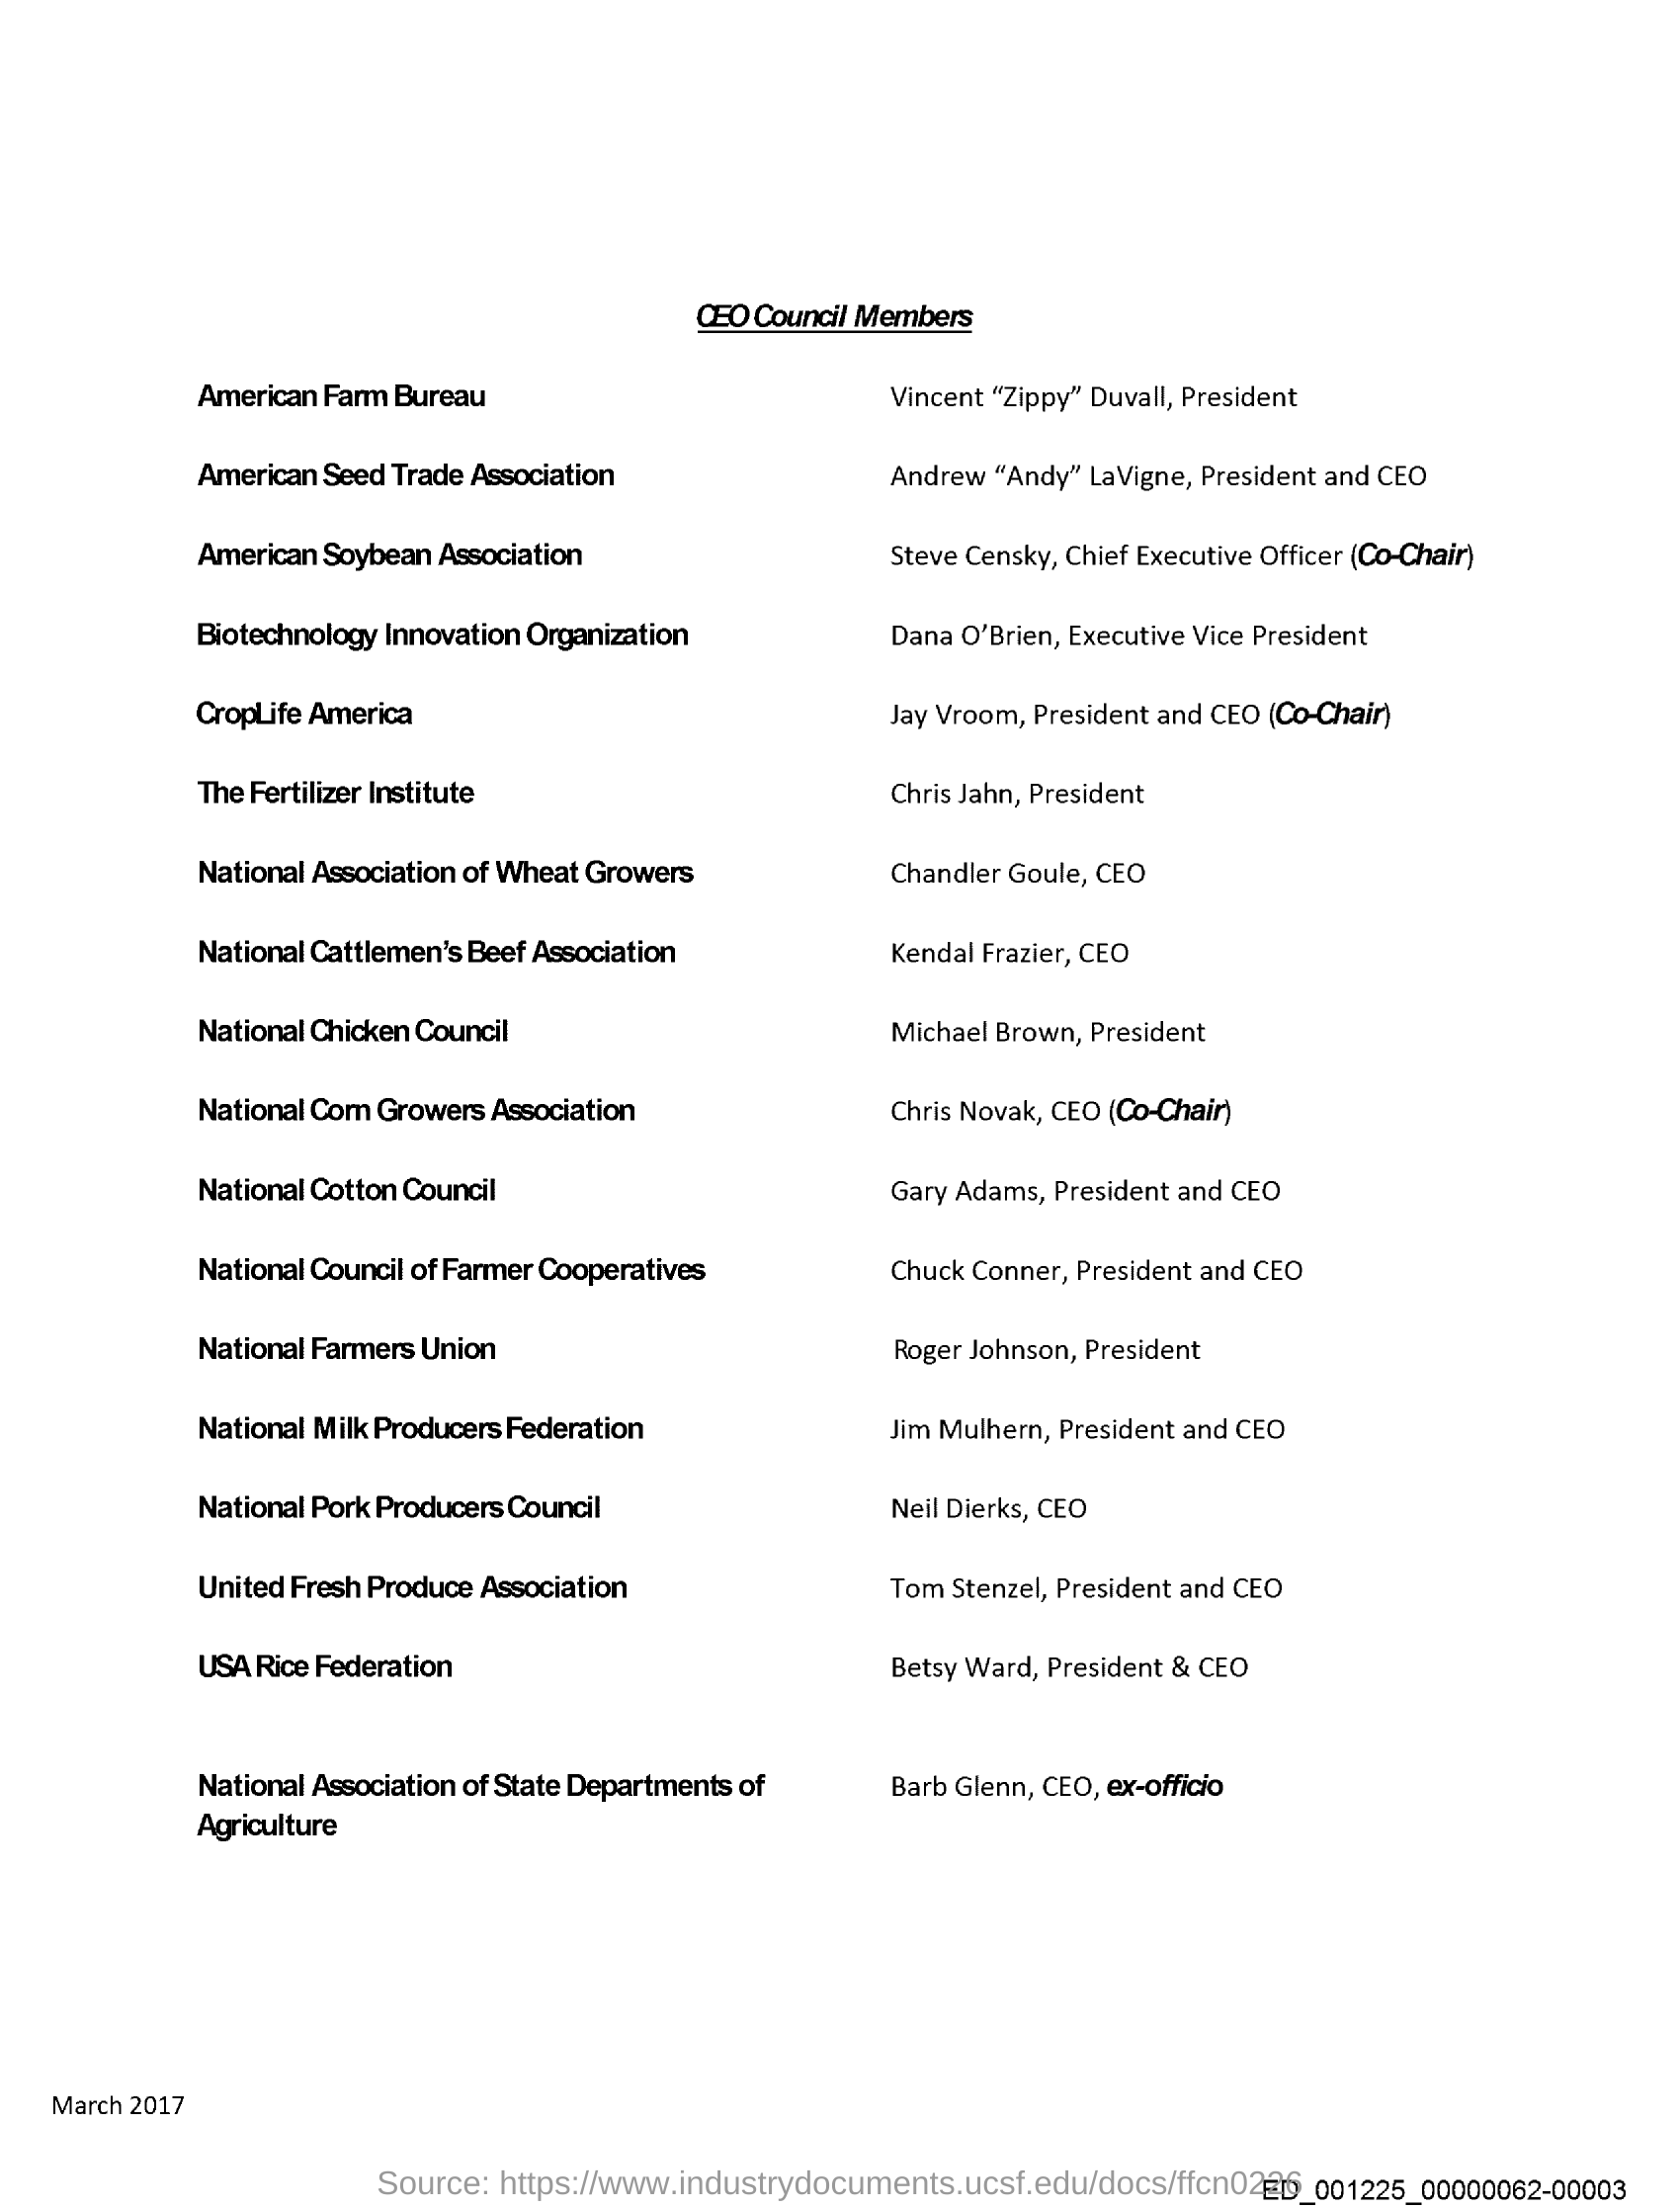

Question:  What is the date mentioned in this document?
GT Answer:  ['March 2017']
Predicted Answer:  The date mentioned in this document is March 2017.
Question:  Who is the President of The Fertilizer Institute?
GT Answer:  ['Chris Jahn']
Predicted Answer:  The President of The Fertilizer Institute is Jay Vroom.
Question:  Roger Johnson is associated with which union?
GT Answer:  ['National Farmers Union']
Predicted Answer:  Roger Johnson is associated with the National Farmers Union.
Question:  What is the title of this document?
GT Answer:  ['CEO Council Members']
Predicted Answer:  CEO Council Members
------------------------------Picture-------------------------


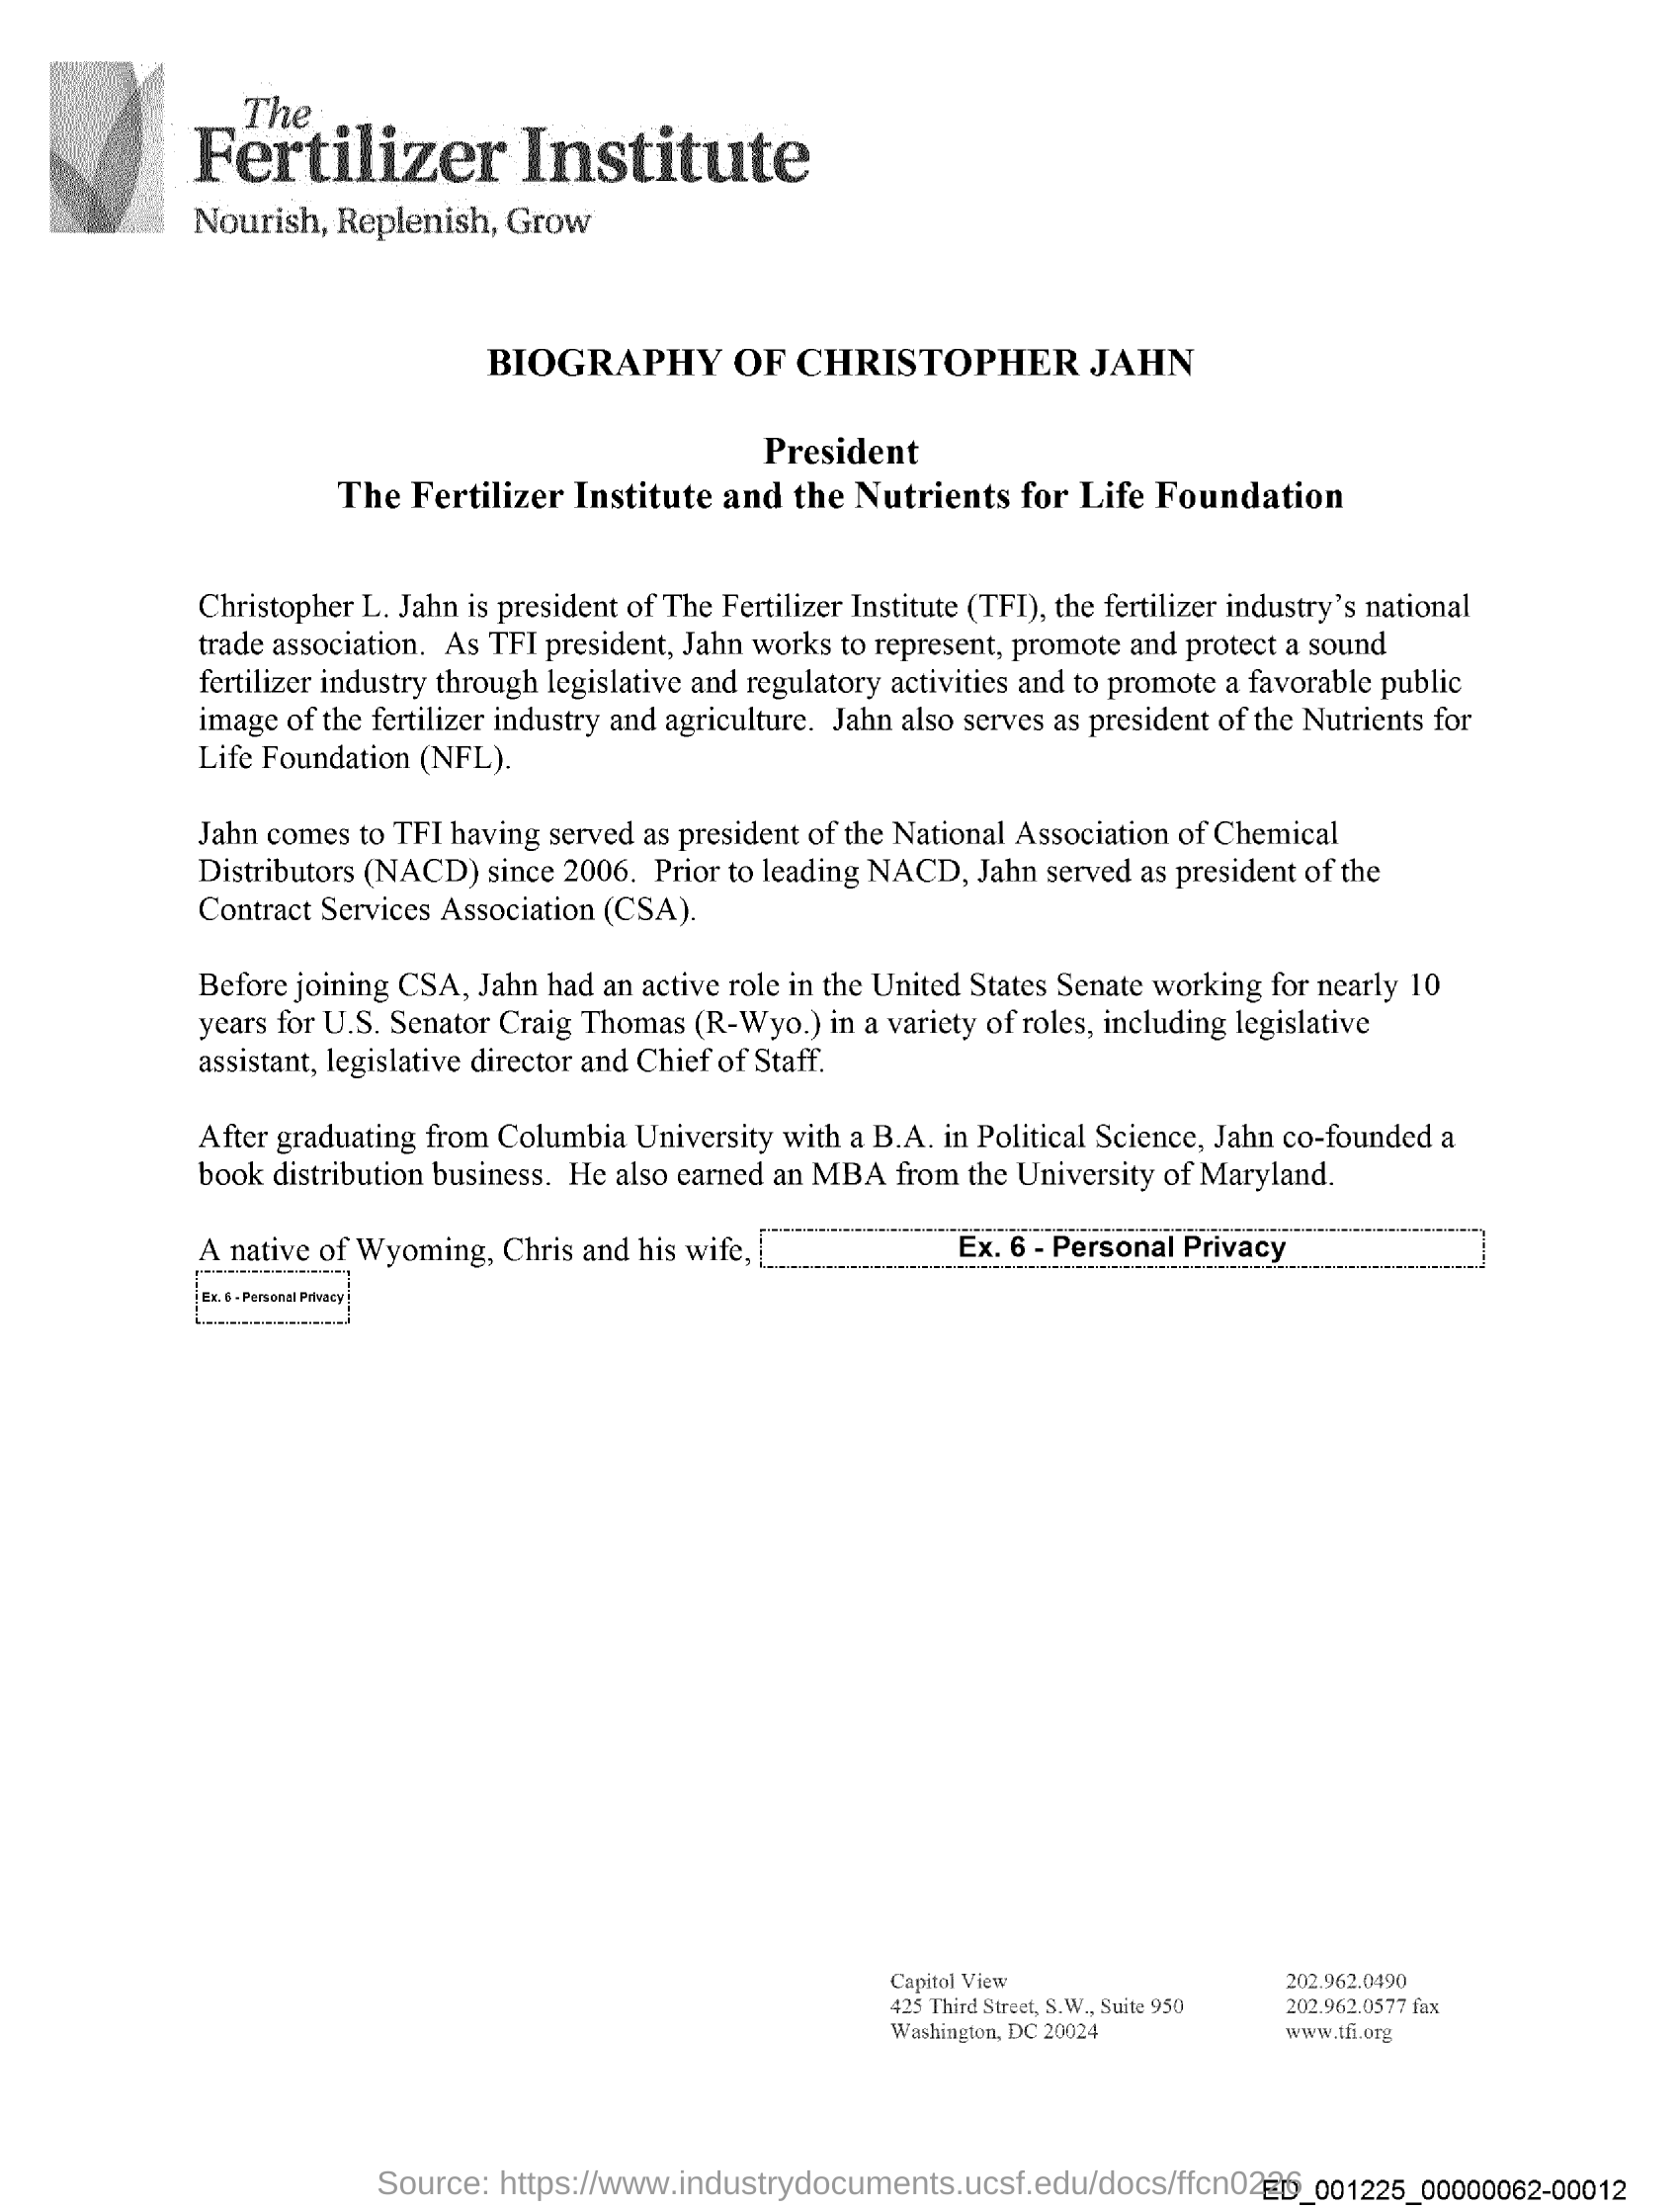

Question:  Whose biography is this?
GT Answer:  ['Christopher Jahn', 'CHRISTOPHER JAHN']
Predicted Answer:  The biography is for Christopher L. Jahn, who is the President of The Fertilizer Institute (TFI) and a Nutrients for Life Foundation Trustee.
Question:  What is the full form of TFI?
GT Answer:  ['The Fertilizer Institute']
Predicted Answer:  TFI stands for The Fertilizer Institute.
Question:  For how many years did Christopher Jahn work for U.S. Senator Craig Thomas?
GT Answer:  ['10 years', '10', 'nearly 10 years']
Predicted Answer:  Christopher Jahn worked for U.S. Senator Craig Thomas for nearly 10 years.
Question:  What is the full form CSA?
GT Answer:  ['Contract Services Association']
Predicted Answer:  CSA stands for Chemical Society of America.
------------------------------Picture-------------------------


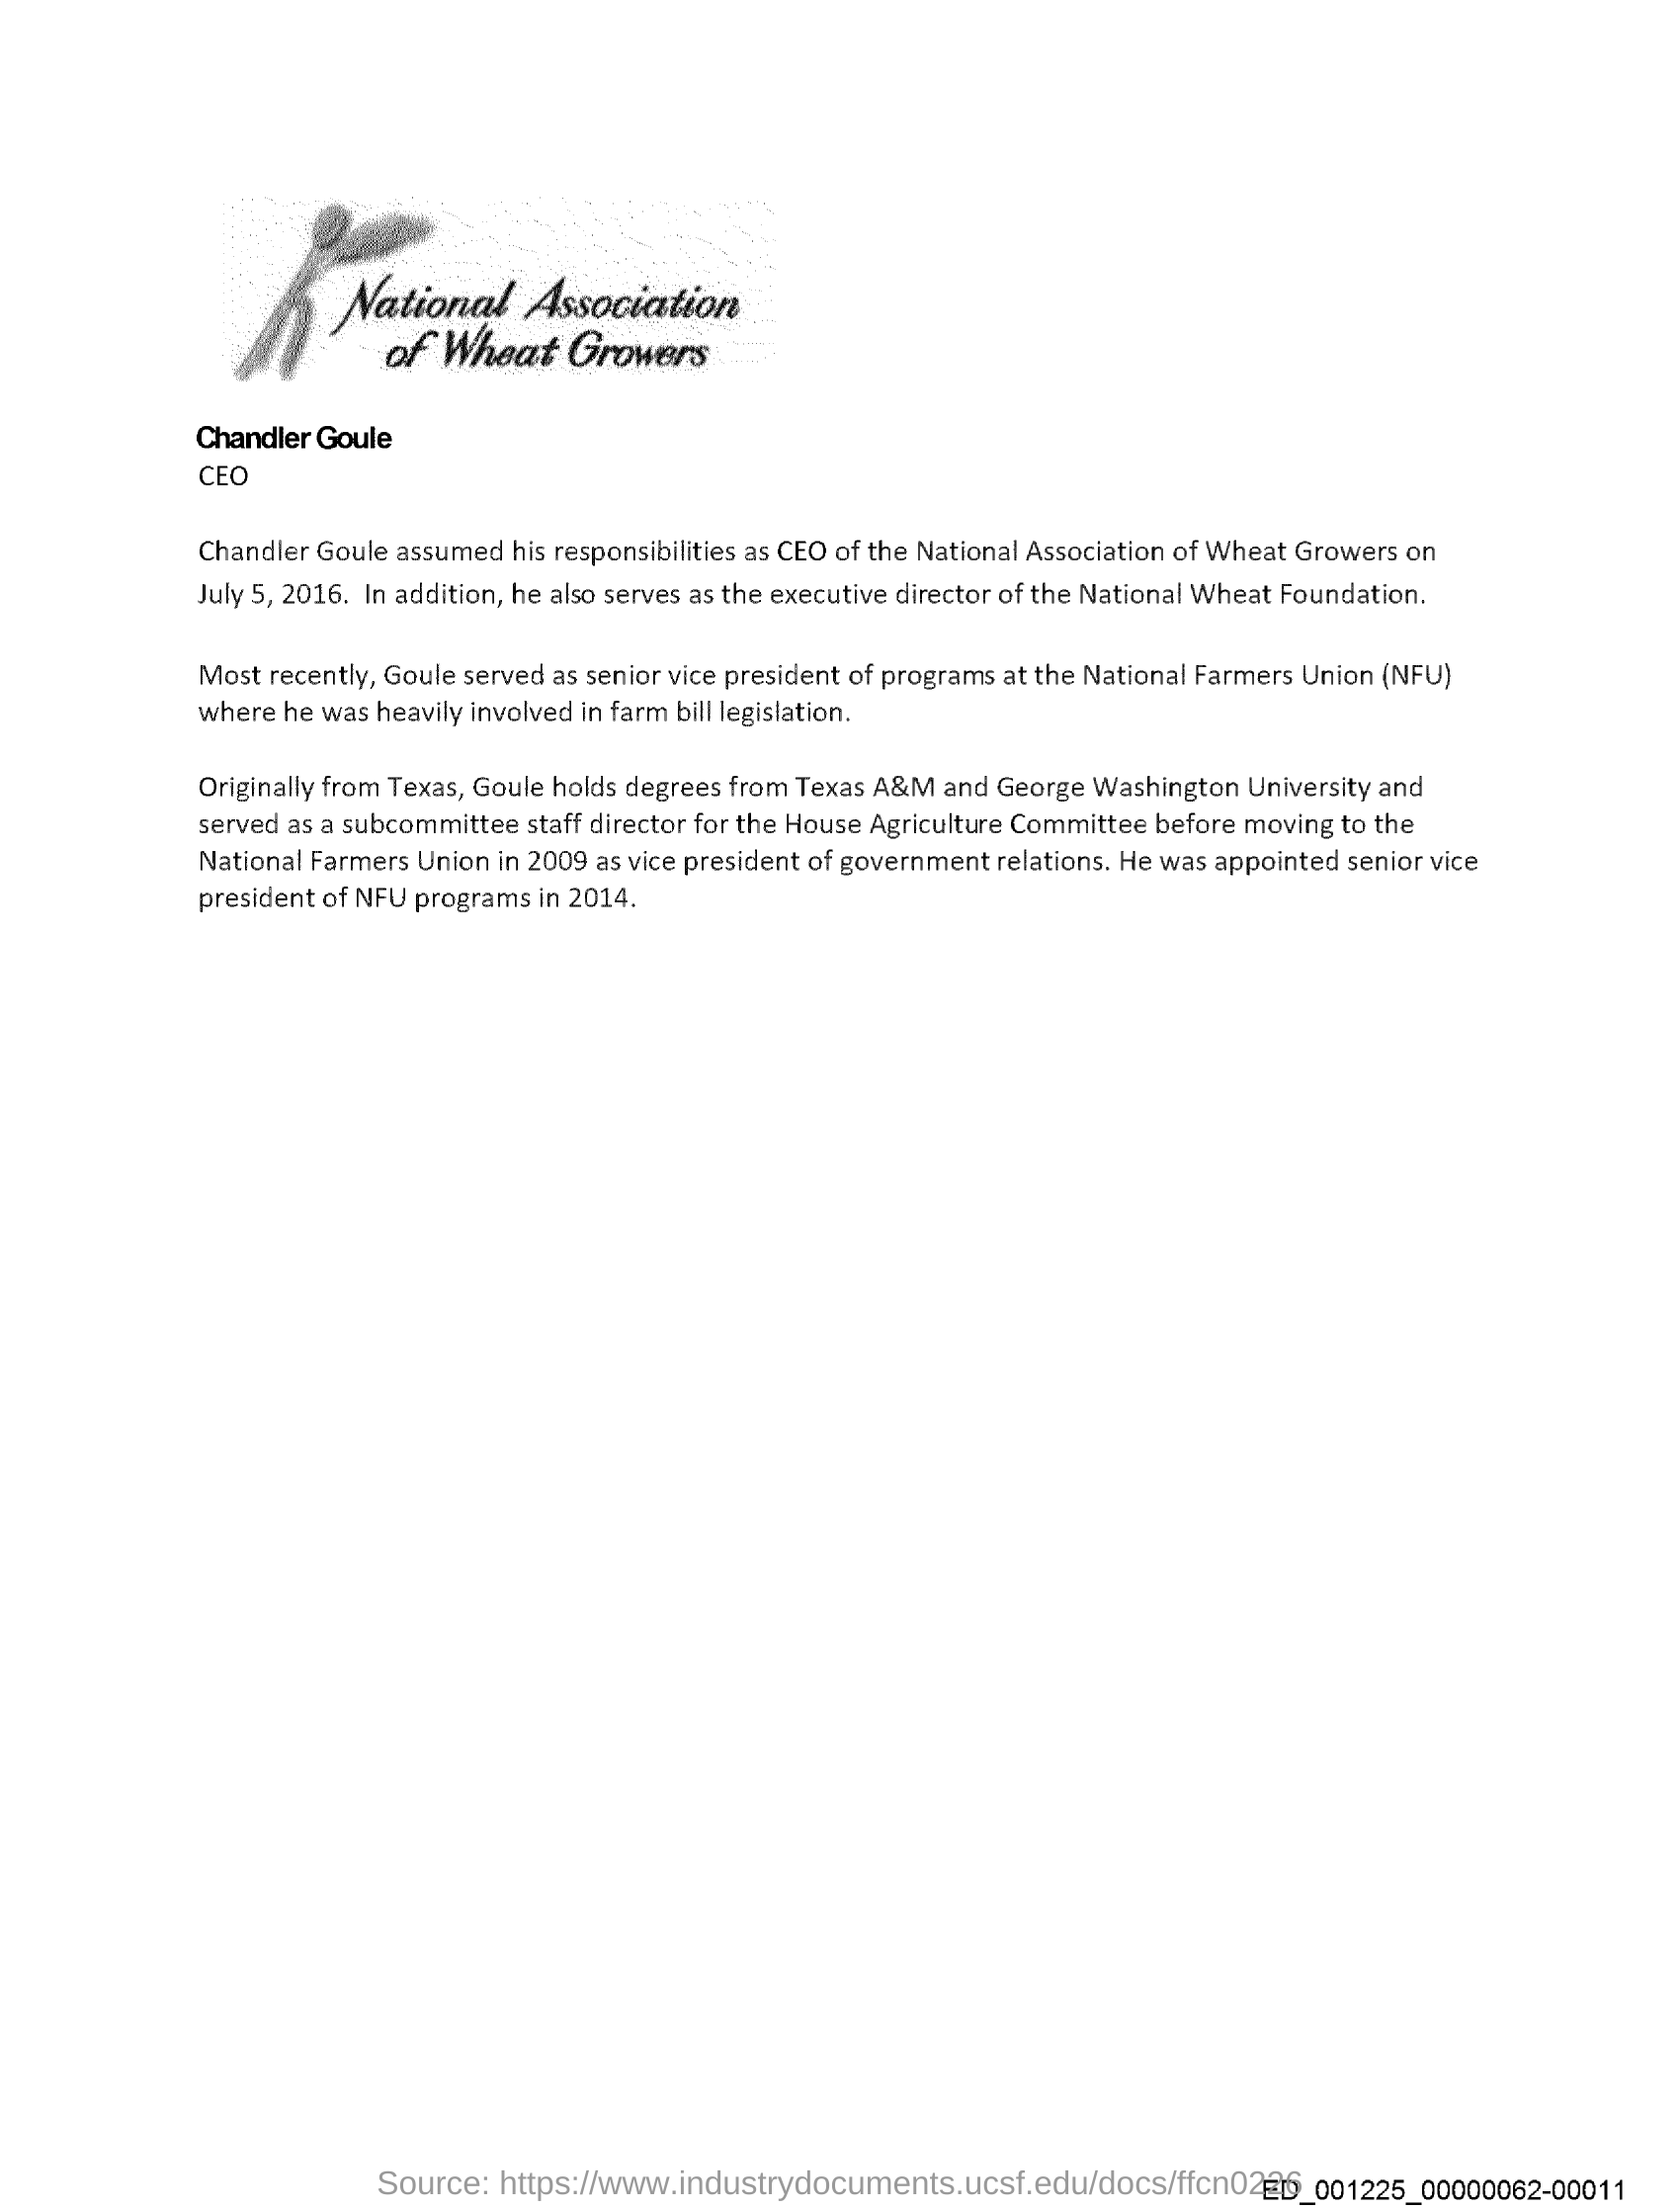

Question:  who is the CEO of National Association of Wheat Growers?
GT Answer:  ['Chandler Goule']
Predicted Answer:  The CEO of the National Association of Wheat Growers is Chandler Goule.
Question:  When did Chandler Goule assume his responsibilities as CEO?
GT Answer:  ['on July 5, 2016.', 'July 5, 2016']
Predicted Answer:  Chandler Goule assumed his responsibilities as CEO of the National Association of Wheat Growers on July 5, 2016.
Question:  What was Chandler Goule's position in national wheat foundation?
GT Answer:  ['Executive Director', 'CEO']
Predicted Answer:  Chandler Goule was the CEO of the National Association of Wheat Growers.
Question:  Earlier where did Goule worked as senior vice president of programs?
GT Answer:  ['At National Farmers Union.', 'NFU', 'National Farmers Union']
Predicted Answer:  The text in the image mentions that Chandler Goule worked as senior vice president of programs at the National Farmers Union (NFLU). However, the specific time period when h

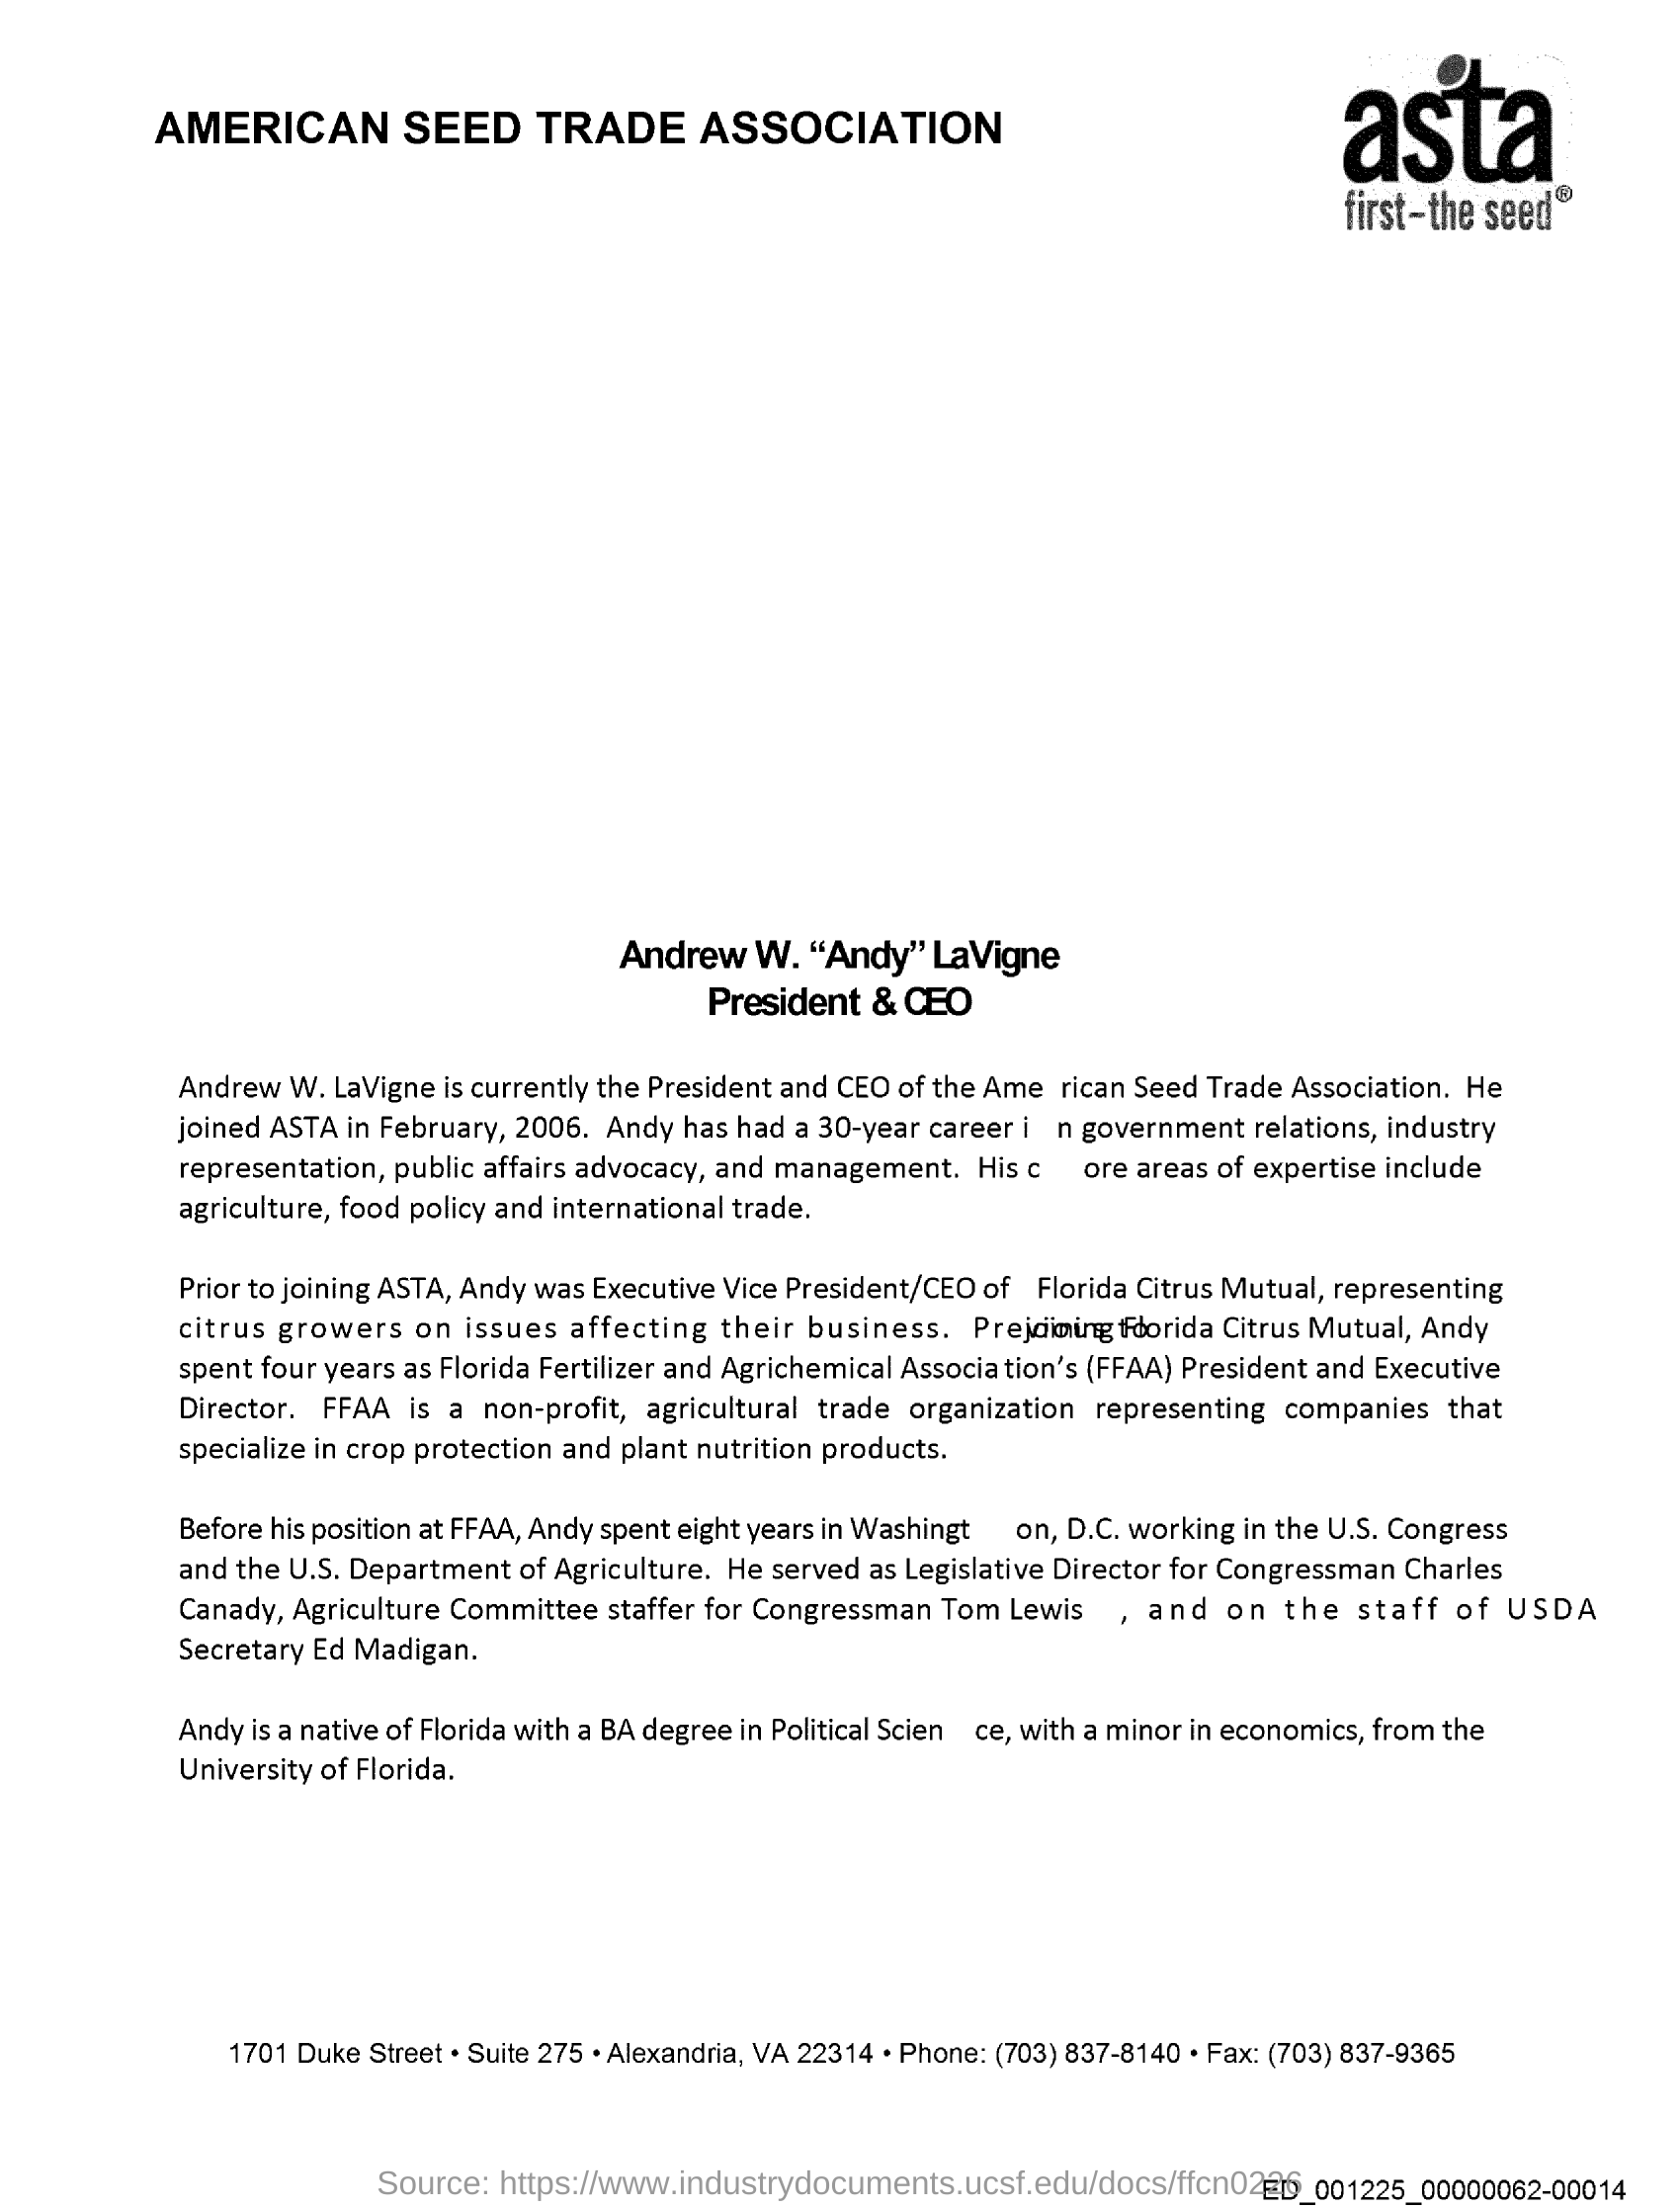

Question:  Who is currently the President and CEO of the American Seed Trade Association?
GT Answer:  ['Andrew W.LaVigne', 'Andrew W. "Andy" LaVigne', 'Andrew W. LaVigne']
Predicted Answer:  The current President and CEO of the American Seed Trade Association is Andrew W. LaVigne.
Question:  When Andrew W.LaVigne joined ASTA
GT Answer:  ['February, 2006']
Predicted Answer:  The text you've provided appears to be a resume or professional profile for a person named Andrew W. LaVigne. It mentions his current position as President and CEO of the American Seed Trade Association, and his previous roles in the agricultural and seed trade industry. The text is too small to read all the details, but it seems to highlight his experience in government relations, public affairs, and management.

The document also includes contact information at the bottom, which includes a phone number and an email address. The text is part of a larger document, as indicated by the page number "170" and the docume

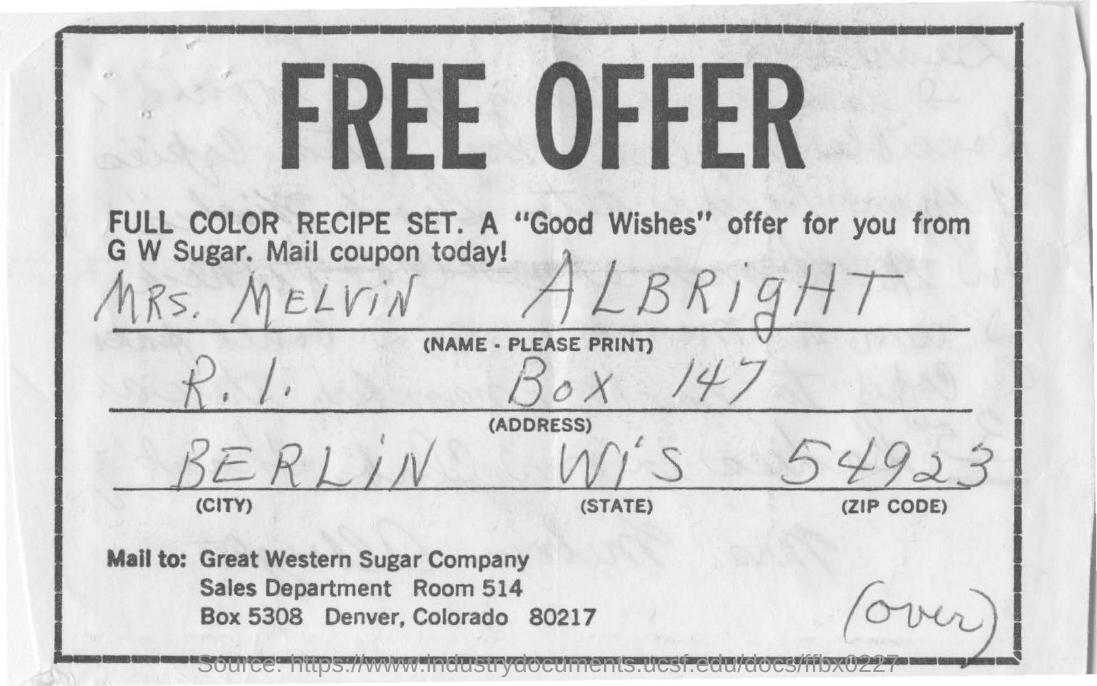

Question:  What is the name of the person in this document?
GT Answer:  ['Mrs. Melvin Albright', 'MRS. MELVIN   ALBRIGHT']
Predicted Answer:  The name of the person in this document is Mrs. Melvin Albright.
Question:  Which city does Mrs. Melvin Albright belongs to?
GT Answer:  ['berlin', 'BERLIN']
Predicted Answer:  Mrs. Melvin Albright belongs to Berlin, as indicated on the free offer coupon.
Question:  What is the zipcode no  given?
GT Answer:  ['54923']
Predicted Answer:  The zip code number given is 80217.
------------------------------Picture-------------------------


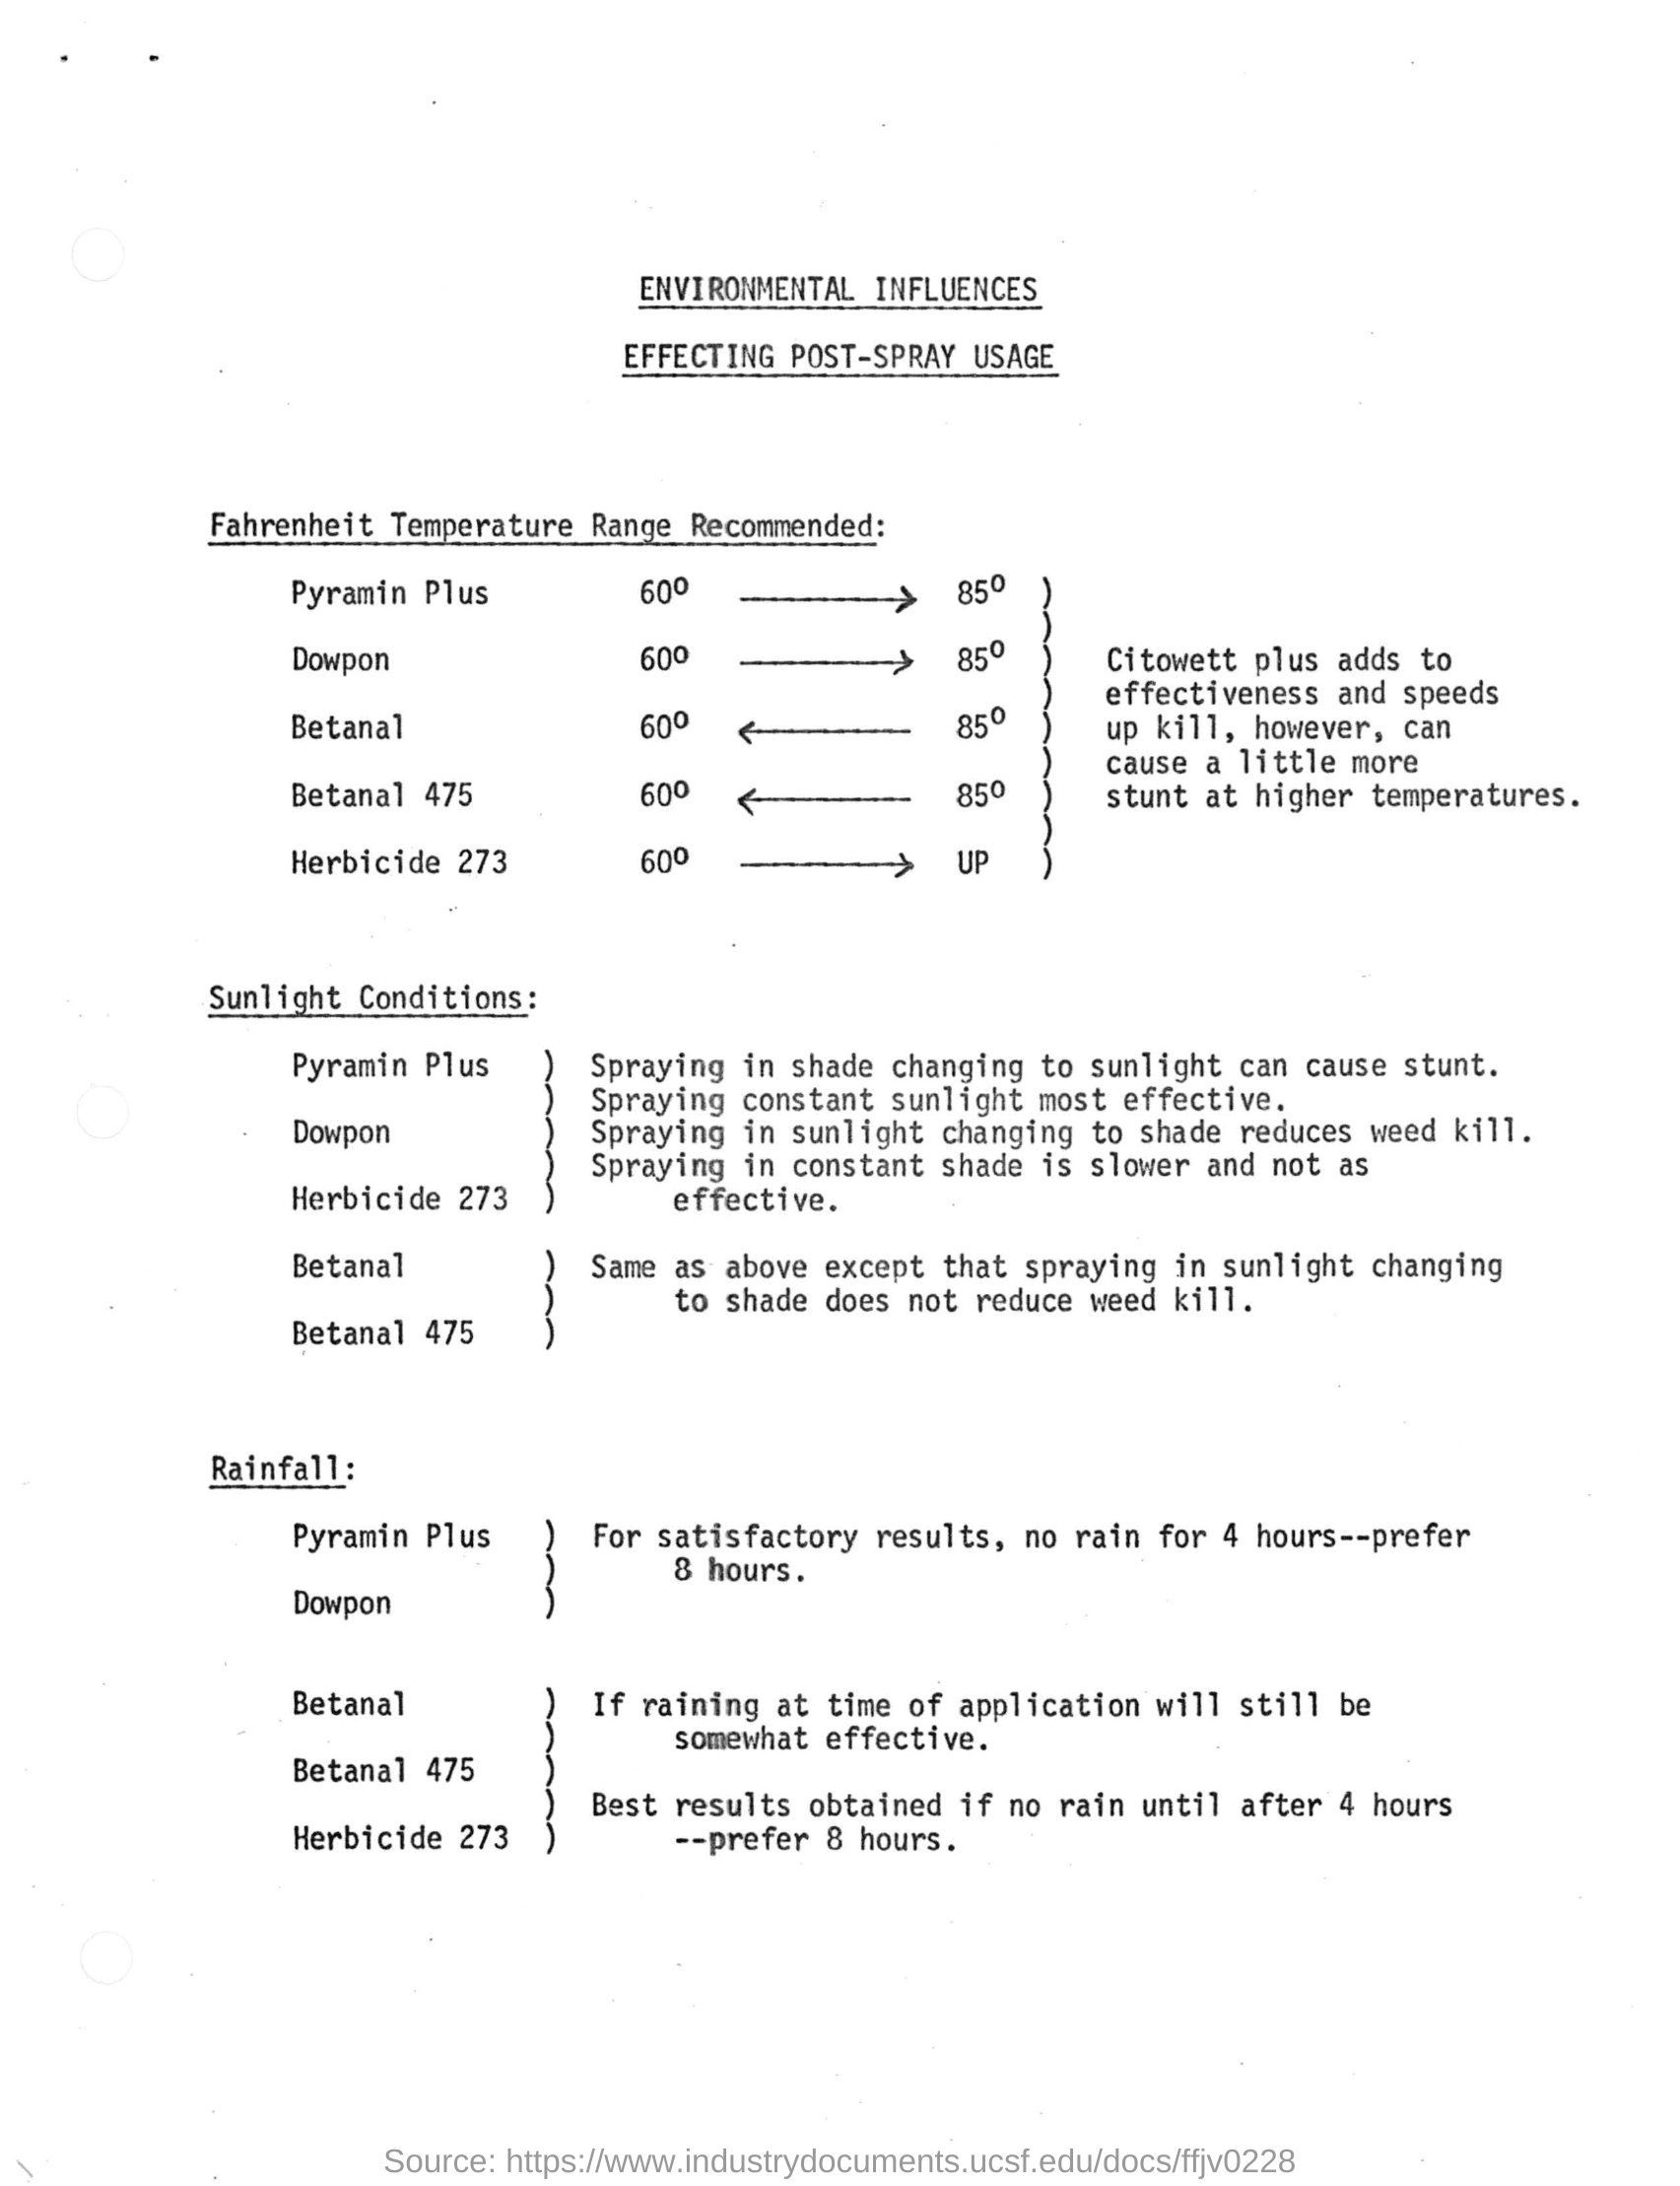

Question:  Name of the document
GT Answer:  ['ENVIRONMENTAL INFLUENCES EFFECTING POST-SPRAY USAGE']
Predicted Answer:  The document is titled "ENVIRONMENTAL INFLUENCES EFFECTING POST-SPRAY USAGE." It appears to be a technical or scientific report or paper discussing the environmental factors that can affect the usage of post-spray treatments.
Question:  citowett plus adds to effectiveness and speeds up kill, however, can cause a little more stunt at what temperatures
GT Answer:  ['higher', 'Higher']
Predicted Answer:  The image you've provided appears to be a page from a document or manual, specifically discussing environmental influences on the effectiveness of post-spray usage. The page is titled "Environmental Influences" and includes a table titled "Fahrenheit Temperature Range Recommended."

The table lists various temperature ranges and their corresponding effects on the effectiveness of post-spray usage. It includes specific temperatures for different types of pesticides or herb

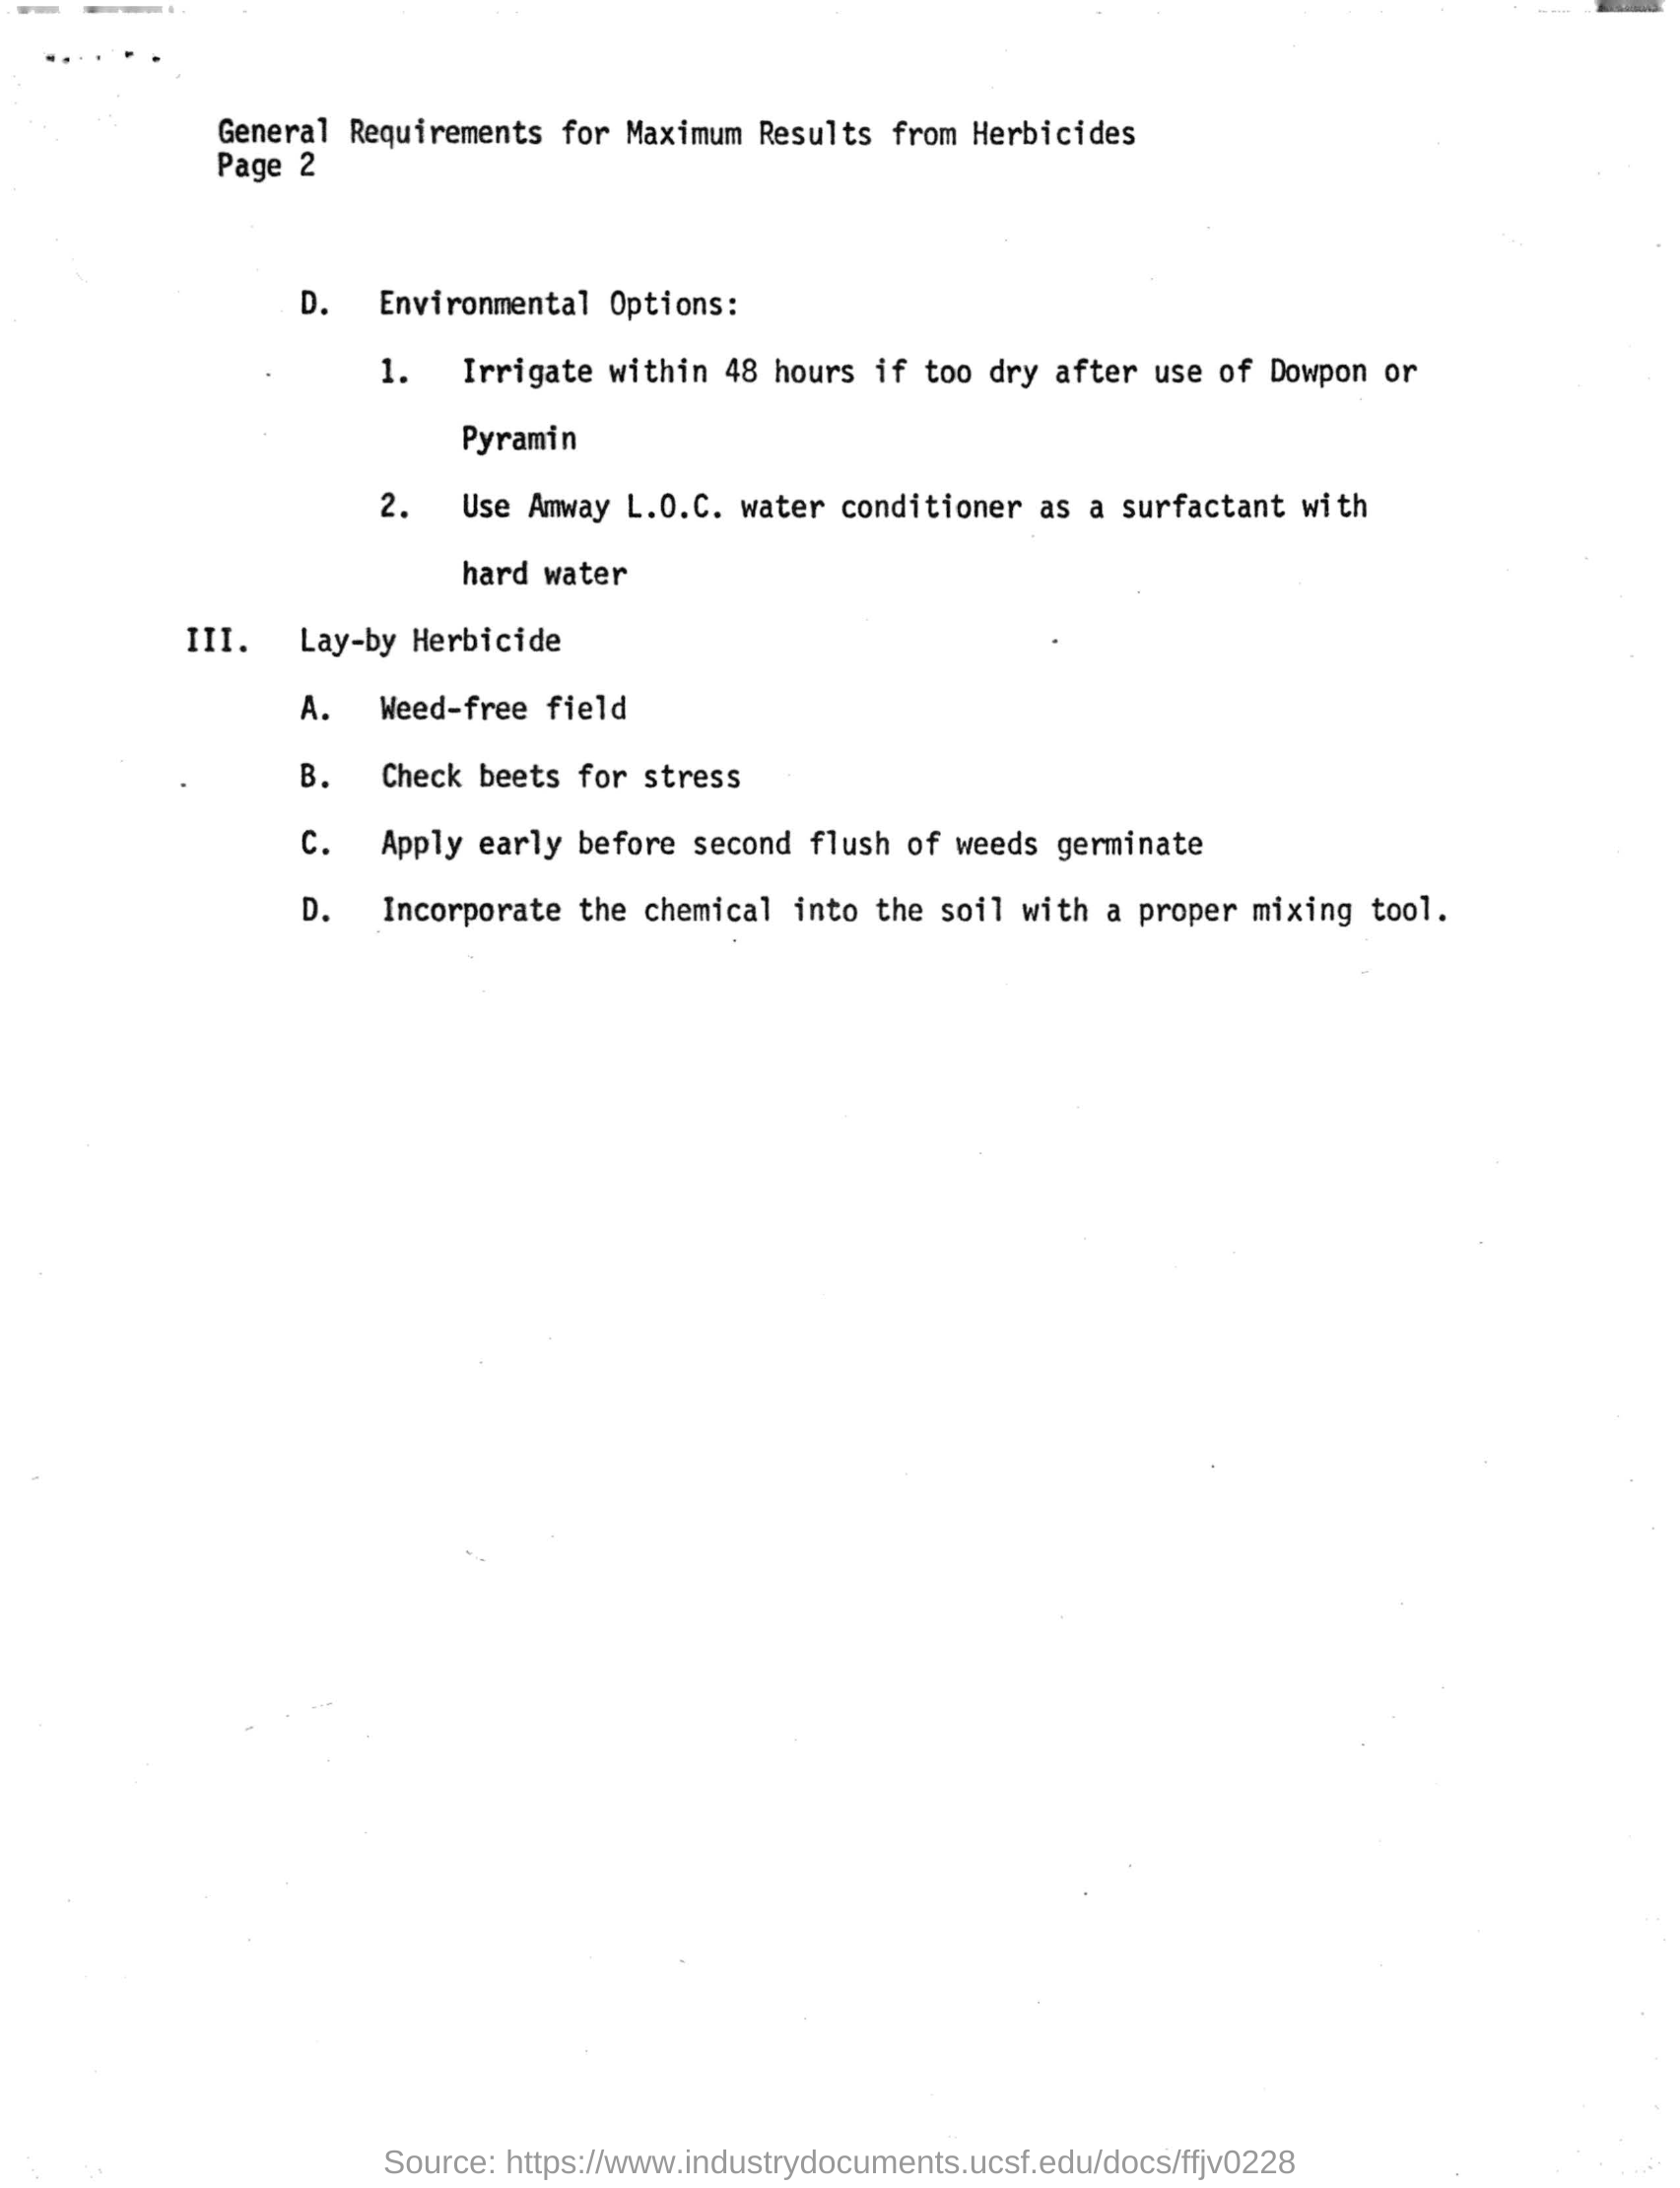

Question:  which water conditioner is used as surfactant with hard water
GT Answer:  ['Amway L.O.C.']
Predicted Answer:  The image you've provided appears to be a page from a document that outlines general requirements for maximum results from Herbicides. The page is numbered 2 and includes a list of environmental options and instructions for use.

The instructions for use mention the use of Amway L.O.C. water conditioner as a surfactant with hard water. This suggests that the Amway L.O.C. water conditioner is being recommended for use in conjunction with hard water to enhance the effectiveness of the herbicides being applied.
Question:  How many environmental options are listed?
GT Answer:  ['2']
Predicted Answer:  There are three environmental options listed:

1. Irrigate within 48 hours if too dry after use of Doppon or Pyramin
2. Use Amway L.O.C. water conditioner as a surfactant with hard water
3. Lay-by-Herbicide
------------------------------Picture-------------------------


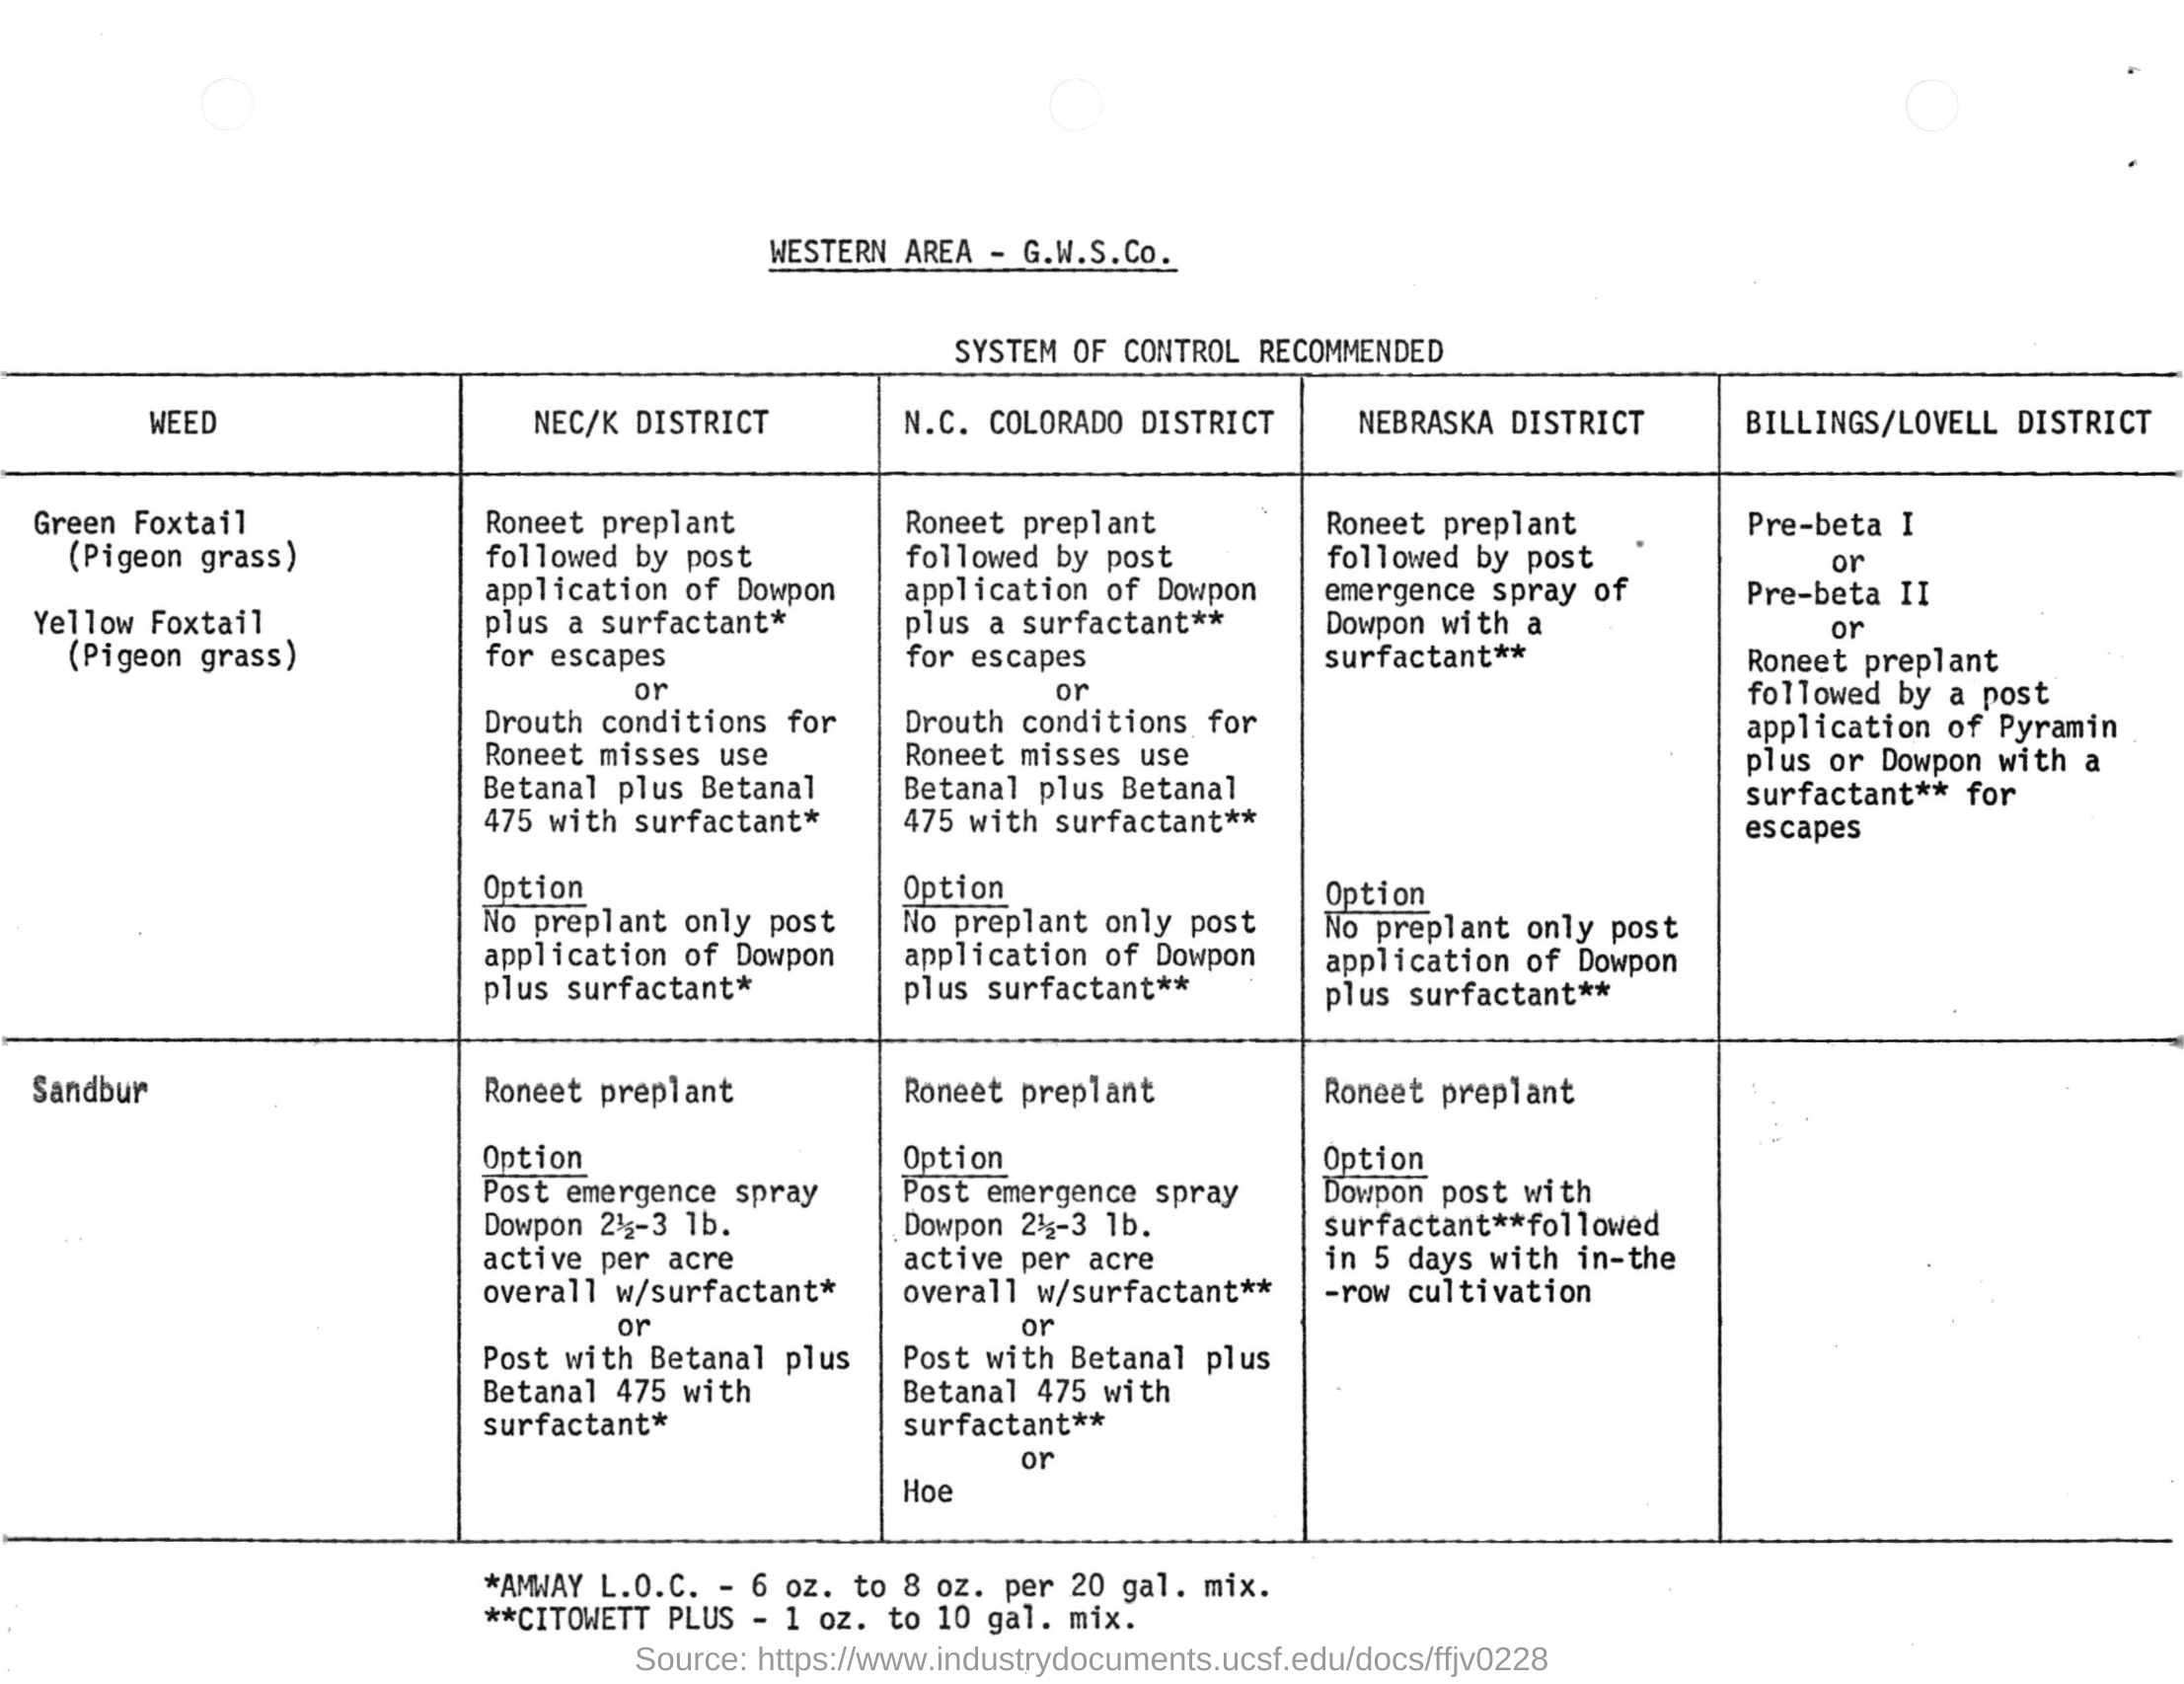

Question:  What is the heading of the document?
GT Answer:  ['WESTERN AREA - G.W.S.CO.', 'WESTERN AREA - G.W.S.Co.']
Predicted Answer:  The heading of the document is "WESTERN AREA - G.W.S. CO."
Question:  What is the heading of the table?
GT Answer:  ['SYSTEM OF CONTROL RECOMMENDED']
Predicted Answer:  The heading of the table is "SYSTEM OF CONTROL RECOMMENDED."
Question:  What did the first asterisk(*) mean?
GT Answer:  ['AMWAY L.O.C. - 6 OZ. TO 8 OZ. PER 20 GAL. MIX', 'AMWAY L.O.C. - 6 oz. to 8 oz. per 20 gal. mix.']
Predicted Answer:  The asterisk (*) in the image is likely used to indicate a footnote or a note that provides additional information or clarification. In the context of the table, the asterisk is probably used to explain certain terms, conditions, or recommendations that are not immediately clear from the main text of the table.

For example, the asterisk could be used to explain what "Pre-beta II" means, or to provide more details about the "Ronco preplant" mentioned 

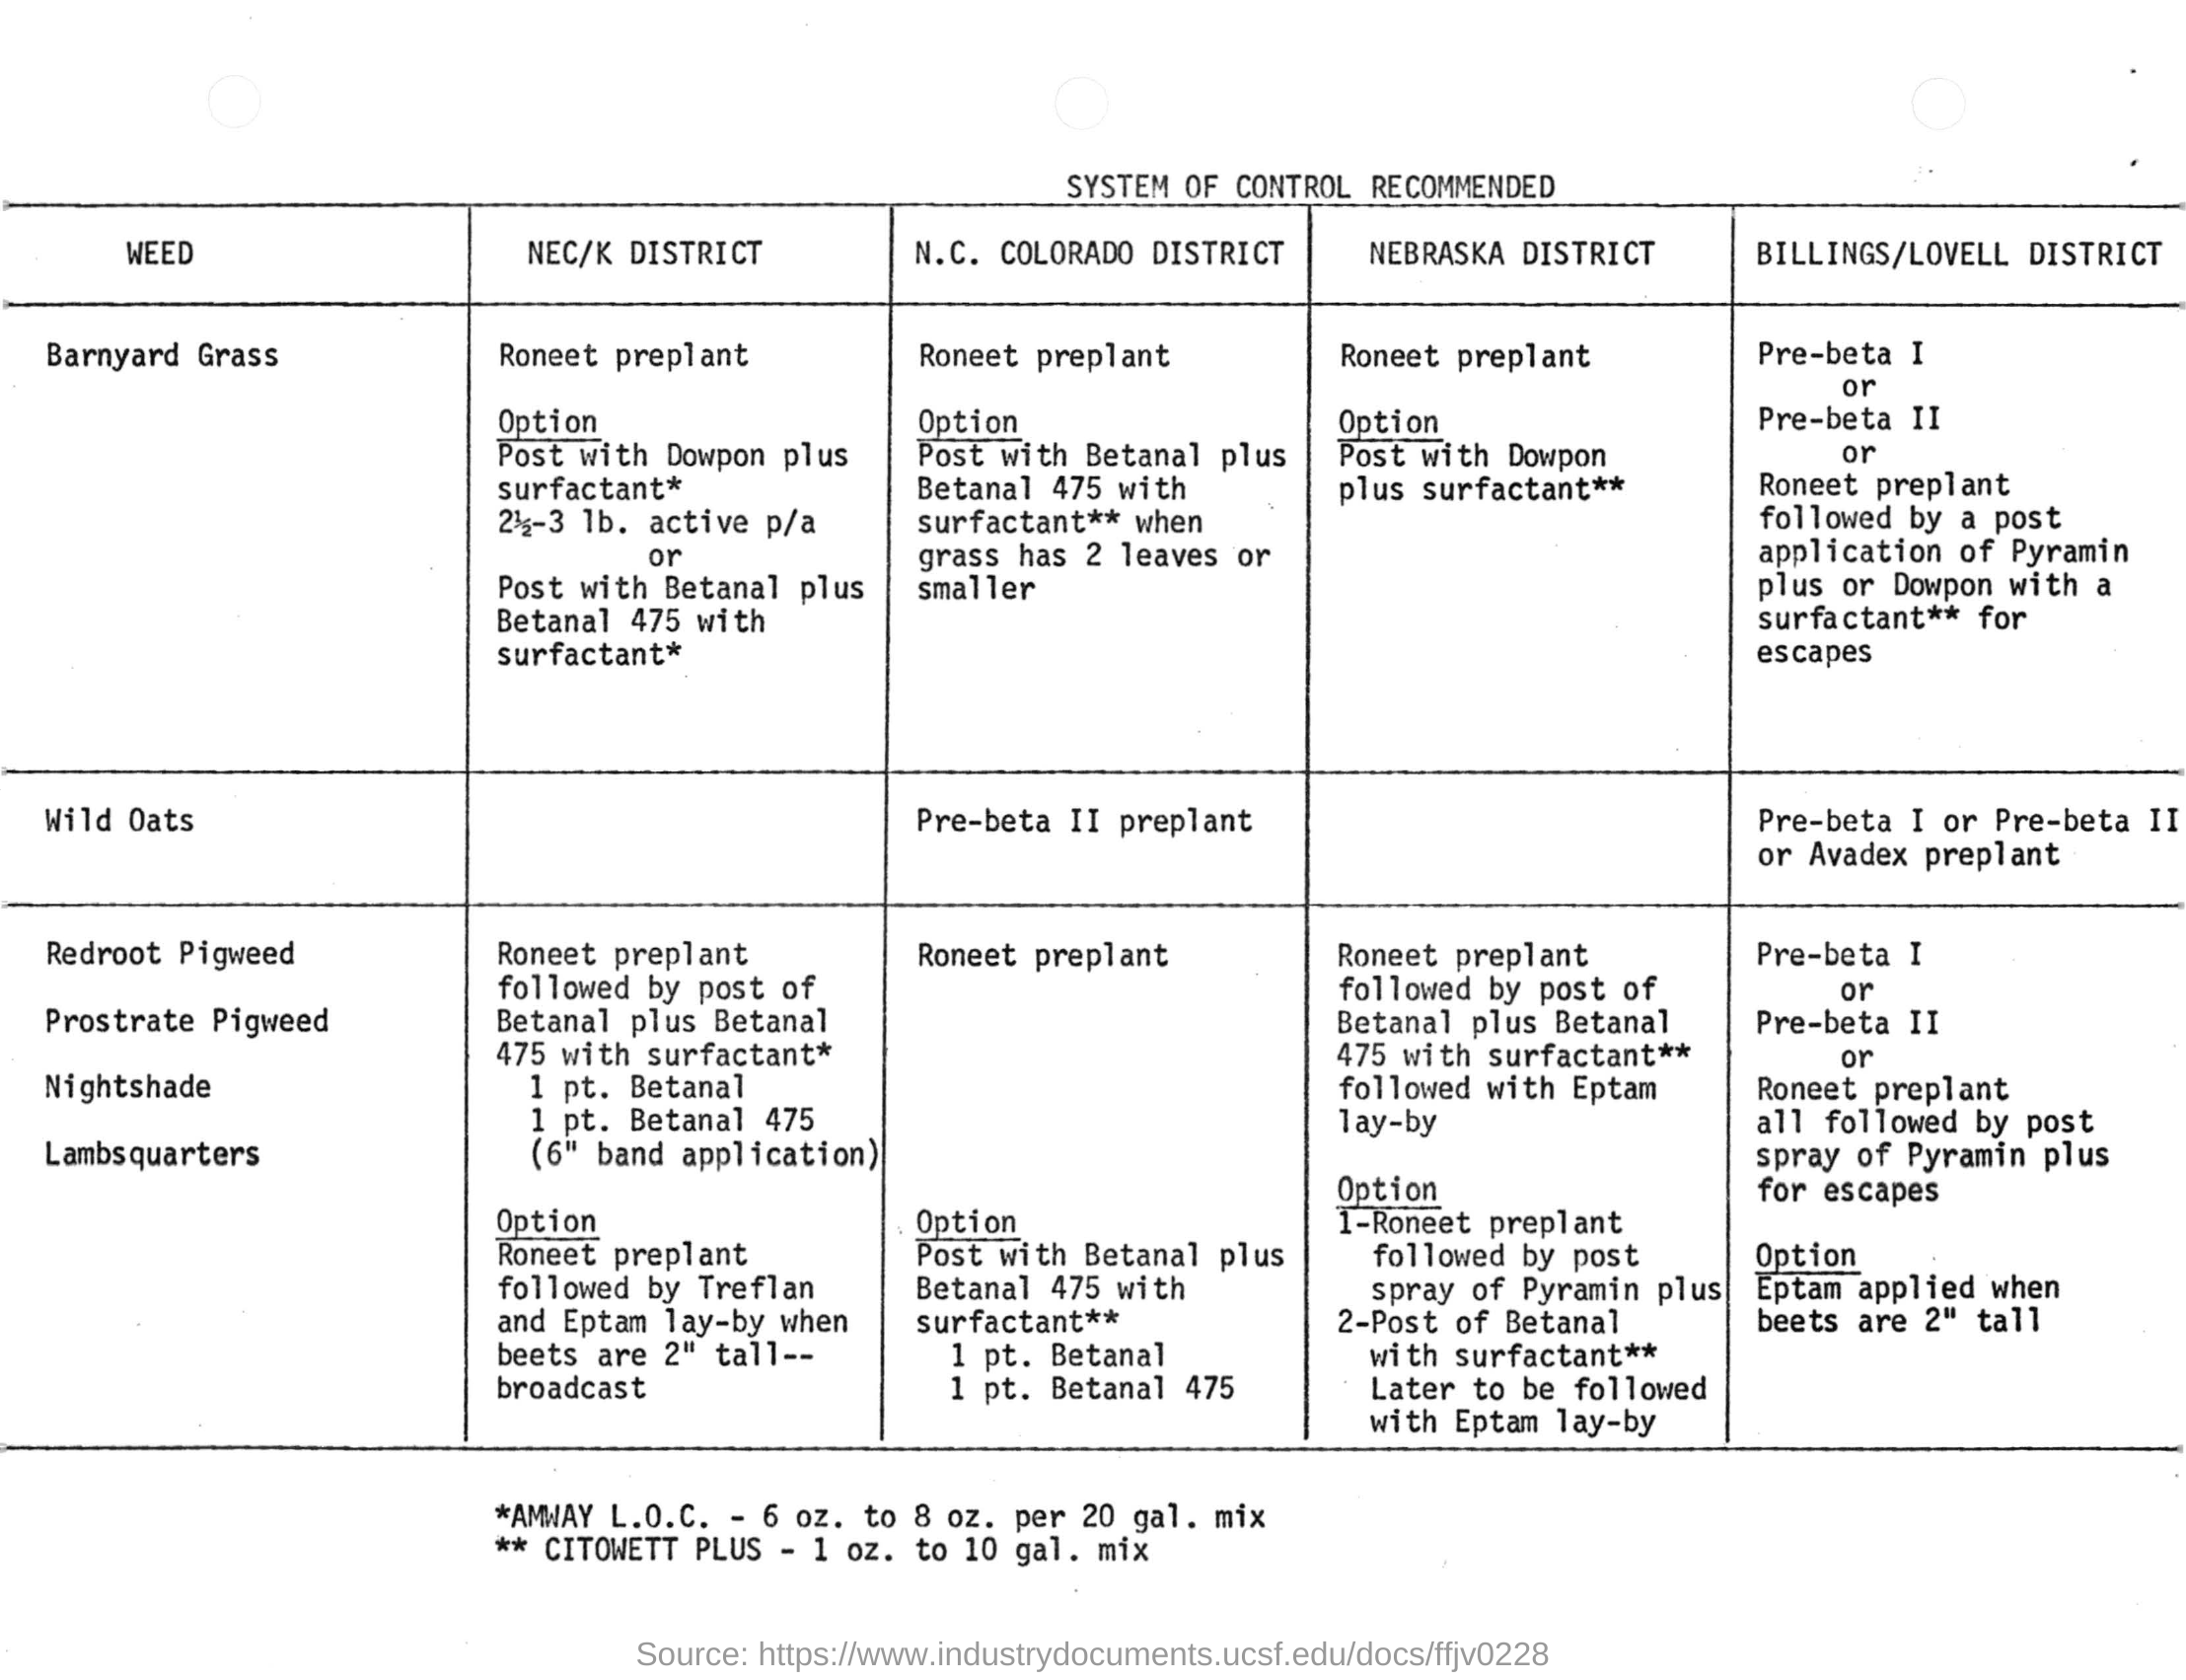

Question:  what is the heading for the document?
GT Answer:  ['system of control recommended']
Predicted Answer:  The heading for the document is "SYSTEM OF CONTROL RECOMMENDED."


In [14]:
from llava.conversation import conv_templates, SeparatorStyle
from llava.mm_utils import process_images, tokenizer_image_token
import PIL.Image as Image


print(len(samples))
last_name = ""
for gt in samples:
    img_flie = os.path.join("./data/docVQA-S", gt["image"].split('/')[-1])
    if last_name!= img_flie:
        print("------------------------------Picture-------------------------")
        last_name = img_flie
        img =Image.open(img_flie)
        img.show()

    query = gt["question"]
    answer = gt["answers"]
    
    # model input
    qs = query
    image_token_se = DEFAULT_IM_START_TOKEN + DEFAULT_IMAGE_TOKEN + DEFAULT_IM_END_TOKEN
    if IMAGE_PLACEHOLDER in qs:
        if model.config.mm_use_im_start_end:
            qs = re.sub(IMAGE_PLACEHOLDER, image_token_se, qs)
        else:
            qs = re.sub(IMAGE_PLACEHOLDER, DEFAULT_IMAGE_TOKEN, qs)
    else:
        if model.config.mm_use_im_start_end:
            qs = image_token_se + "\n" + qs
        else:
            qs = DEFAULT_IMAGE_TOKEN + "\n" + qs

    if "llama-2" in model_name.lower():
        conv_mode = "llava_llama_2"
    elif "mistral" in model_name.lower():
        conv_mode = "mistral_instruct"
    elif "v1.6-34b" in model_name.lower():
        conv_mode = "chatml_direct"
    elif "v1" in model_name.lower():
        conv_mode = "llava_v1"
    elif "mpt" in model_name.lower():
        conv_mode = "mpt"
    else:
        conv_mode = "llava_v0"

    if args.conv_mode is not None and conv_mode != args.conv_mode:
        print(
            "[WARNING] the auto inferred conversation mode is {}, while `--conv-mode` is {}, using {}".format(
                conv_mode, args.conv_mode, args.conv_mode
            )
        )
    else:
        args.conv_mode = conv_mode

    args.image_file =  img_flie
    conv = conv_templates[args.conv_mode].copy()
    conv.append_message(conv.roles[0], qs)
    conv.append_message(conv.roles[1], None)
    prompt = conv.get_prompt()
    image_files = image_parser(args)
    images = load_images(image_files)
    image_sizes = [x.size for x in images]
    images_tensor = process_images(
        images,
        image_processor,
        model.config
    ).to(model.device, dtype=torch.float16)

    input_ids = (
        tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors="pt")
        .unsqueeze(0)
        .cuda()
    )

    with torch.inference_mode():
        output_ids = model.generate(
            input_ids,
            images=images_tensor,
            image_sizes=image_sizes,
            do_sample=True if args.temperature > 0 else False,
            temperature=args.temperature,
            top_p=args.top_p,
            num_beams=args.num_beams,
            max_new_tokens=args.max_new_tokens,
            use_cache=True,
            pad_token_id=tokenizer.eos_token_id
        )

    outputs = tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
    print("Question: ", query)
    print("GT Answer: ", gt["answers"])
    print("Predicted Answer: ",outputs)

    
    